In [7]:
import pandas as pd
import matplotlib.pyplot as mlp
import seaborn as shibal
import mplfinance as mplf

# Get Data

## Event Data

In [3]:
eventCols = ["event", "timestamp", "type", "stablecoin"]

with open("../data/ERC20-stablecoins/event_data.csv") as event_f:
    event_df = pd.read_csv(event_f, encoding='latin-1', nrows=5)
    print(f"\n📊 First 5 rows:")


# Parse timestamp if it is unix seconds
event_df["timestamp"] = pd.to_datetime(event_df["timestamp"], unit="s", utc = True)

event_df.head()


📊 First 5 rows:


,event,timestamp,type,stablecoin
0,BlackRock and Fidelity Back USDC in $400 Milli...,2022-04-12 00:00:00+00:00,positive,usdc
1,Terra UST takes over BUSD to become third larg...,2022-04-20 00:00:00+00:00,positive,ustc
2,LARGE amounts of UST selling on ANCHOR (approx...,2022-05-07 00:00:00+00:00,negative,ustc
3,UST depegs LFG deploys assets to defend peg (7...,2022-05-08 00:00:00+00:00,negative,ustc
4,UST Depegs again to 35 cents LUNA keeps falling,2022-05-09 00:00:00+00:00,negative,ustc


In [5]:
tokenCols = [
    "block",
    "log_index",
    "from_addr",
    "to_addr",
    "timestamp",
    "token",
    "amount"
]

token_df = pd.read_csv(
    "../data/ERC20-stablecoins/token_transfers_V3.0.0.csv",
    # sep="\t",
    header=None,
    skiprows=1,
    names=tokenCols
)

# Convert timestamp to datetime
token_df["datetime"] = pd.to_datetime(token_df["timestamp"], unit="s", utc = True)

# Ensure amount is numeric
token_df["amount"] = pd.to_numeric(token_df["amount"])

token_df.info()
token_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36723655 entries, 0 to 36723654
Data columns (total 8 columns):
 #   Column     Dtype              
---  ------     -----              
 0   block      int64              
 1   log_index  int64              
 2   from_addr  object             
 3   to_addr    object             
 4   timestamp  int64              
 5   token      object             
 6   amount     float64            
 7   datetime   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(3)
memory usage: 2.2+ GB


,block,log_index,from_addr,to_addr,timestamp,token,amount,datetime
0,14500001,44,0x27cbb0e6885ccb1db2dab7c2314131c94795fbef,0x8426a27add8dca73548f012d92c7f8f4bbd42a3e,1648811421,0xdac17f958d2ee523a2206206994597c13d831ec7,800.000000,2022-04-01 11:10:21+00:00
1,14500001,62,0x7938b1b2f2d2ec6cde2db46fcb11d824f32eae54,0xffabc91efaf240a48fe2b31d3599925d3504c3df,1648811421,0xdac17f958d2ee523a2206206994597c13d831ec7,579.000000,2022-04-01 11:10:21+00:00
2,14500001,64,0x4593e0fb8dcc65cd24c7f99ee64da2627e90f998,0x97138e4cb36db0185236c3d74cb39fb51cb3228b,1648811421,0xdac17f958d2ee523a2206206994597c13d831ec7,15898.000000,2022-04-01 11:10:21+00:00
3,14500001,68,0x3cd751e6b0078be393132286c442345e5dc49699,0xf4fc2e12974cc3b4d8192722430c571968025d4f,1648811421,0xdac17f958d2ee523a2206206994597c13d831ec7,200.929675,2022-04-01 11:10:21+00:00
4,14500003,0,0xffec0067f5a79cff07527f63d83dd5462ccf8ba4,0x5b0e981798f5880c25b54c5de4005f5ec1f3f46a,1648811424,0xdac17f958d2ee523a2206206994597c13d831ec7,651.675449,2022-04-01 11:10:24+00:00


get stuff from apr to jun

In [6]:
cutoff_date = pd.Timestamp("2022-06-30", tz="UTC")

token_df = token_df[token_df["datetime"] <= cutoff_date]

get day by day volume

In [11]:
token_df["date"] = token_df["datetime"].dt.date
daily_volume = (
    token_df
    .groupby("date")["amount"]
    .sum()
    .reset_index()
)

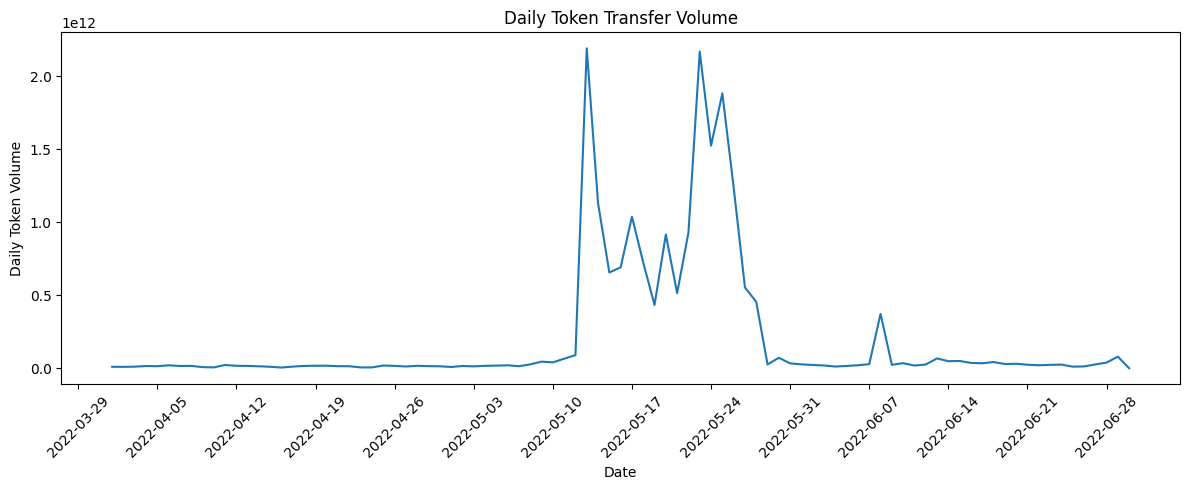

In [13]:
import matplotlib.dates as mdates

fig, ax = mlp.subplots(figsize=(12, 5))

ax.plot(daily_volume["date"], daily_volume["amount"])

ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

ax.set_xlabel("Date")
ax.set_ylabel("Daily Token Volume")
ax.set_title("Daily Token Transfer Volume")

mlp.xticks(rotation=45)
mlp.tight_layout()
mlp.show()